# Uber Fare Prediction - End-to-End Machine Learning Project

## Dataset Overview

This project uses the **New York City Uber Fare Dataset** from Kaggle, which contains historical data about Uber rides in NYC. The goal is to predict the fare amount for each trip based on various features.

### Dataset Fields

The dataset contains the following fields:

- **key** - A unique identifier for each trip
- **fare_amount** - The cost of each trip in USD (TARGET VARIABLE)
- **pickup_datetime** - Date and time when the meter was engaged
- **passenger_count** - The number of passengers in the vehicle (driver entered value)
- **pickup_longitude** - The longitude where the meter was engaged
- **pickup_latitude** - The latitude where the meter was engaged
- **dropoff_longitude** - The longitude where the meter was disengaged
- **dropoff_latitude** - The latitude where the meter was disengaged


### Dataset Size
- **200,000 rows** (rides)
- **9 columns** (features)

### Business Context
Predicting taxi fares accurately is important for:
- Setting fair prices for customers
- Estimating trip costs before booking
- Detecting fraudulent or erroneous charges
- Understanding pricing patterns and factors

### Data Source
Dataset obtained from Kaggle: [New York City Taxi Fare Prediction](https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction)


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [ ]:
# Extract and load the data
zip_path = 'uber.csv.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()
    print("Extracted uber.csv from zip file")

df = pd.read_csv('uber.csv')
print(f"\nDataset shape: {df.shape}")



Extracted uber.csv from zip file

Dataset shape: (200000, 9)


In [ ]:
print(f"\nColumns: {list(df.columns)}")



Columns: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [ ]:
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647               

In [ ]:
print("\nData info:")
print(df.info())



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None


In [ ]:
print("\nBasic statistics:")
print(df.describe())



Basic statistics:
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.000000  
25%          

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [ ]:
print(f"\nFare amount range: ${df['fare_amount'].min():.2f} to ${df['fare_amount'].max():.2f}")
print(f"Negative fares: {(df['fare_amount'] < 0).sum()}")
print(f"Zero fares: {(df['fare_amount'] == 0).sum()}")


# Check passenger count
print(f"\nPassenger count range: {df['passenger_count'].min()} to {df['passenger_count'].max()}")
print(f"Zero passengers: {(df['passenger_count'] == 0).sum()}")

# Check coordinates
print(f"\nInvalid coordinates (0,0): {((df['pickup_longitude'] == 0) | (df['pickup_latitude'] == 0)).sum()}")




Fare amount range: $-52.00 to $499.00
Negative fares: 17
Zero fares: 5

Passenger count range: 0 to 208
Zero passengers: 709

Invalid coordinates (0,0): 3789


3. Data exploration

In [ ]:
### Missing Data Analysis
# Calculate missing data percentage
missing_data = train_set.isnull().sum()
missing_percent = (missing_data / len(train_set)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Missing Data Summary:")
print(missing_df)

Missing Data Summary:
                   Missing Count  Percentage
dropoff_longitude              1    0.000625
dropoff_latitude               1    0.000625


In [ ]:
# Display quantile statistics (percentiles)
print("\nQuantile Statistics (Percentiles):")
quantiles = train_set.describe(percentiles=[.01, .05, .25, .50, .75, .95, .99])
print(quantiles)


Quantile Statistics (Percentiles):
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  1.600000e+05  160000.000000     160000.000000    160000.000000   
mean   2.771233e+07      11.351493        -72.525896        39.936265   
std    1.603218e+07       9.796726         11.557753         8.090121   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
1%     5.438926e+05       3.300000        -74.014412         0.000000   
5%     2.693977e+06       4.100000        -74.006838        40.701643   
25%    1.379326e+07       6.000000        -73.992062        40.734842   
50%    2.775608e+07       8.500000        -73.981834        40.752594   
75%    4.155845e+07      12.500000        -73.967212        40.767116   
95%    5.267404e+07      30.270000        -73.871167        40.787680   
99%    5.487708e+07      53.100000          0.000000        40.806465   
max    5.542357e+07     350.000000         57.418457      1644.421482   

       dropoff

In [ ]:
# Comprehensive descriptive statistics
print("\nDescriptive Statistics:")
print(train_set.describe(include='all'))

# Additional statistics
print("\nAdditional Statistics:")
for col in train_set.select_dtypes(include=[np.number]).columns:
    print(f"\n{col}:")
    print(f"  Skewness: {train_set[col].skew():.2f}")
    print(f"  Kurtosis: {train_set[col].kurtosis():.2f}")



Descriptive Statistics:
          Unnamed: 0                           key    fare_amount  \
count   1.600000e+05                        160000  160000.000000   
unique           NaN                        160000            NaN   
top              NaN  2009-01-31 11:27:00.00000019            NaN   
freq             NaN                             1            NaN   
mean    2.771233e+07                           NaN      11.351493   
std     1.603218e+07                           NaN       9.796726   
min     1.000000e+00                           NaN     -52.000000   
25%     1.379326e+07                           NaN       6.000000   
50%     2.775608e+07                           NaN       8.500000   
75%     4.155845e+07                           NaN      12.500000   
max     5.542357e+07                           NaN     350.000000   

                pickup_datetime  pickup_longitude  pickup_latitude  \
count                    160000     160000.000000    160000.000000   
unique

In [ ]:
# Comprehensive descriptive statistics
print("\nDescriptive Statistics:")
print(train_set.describe(include='all'))

# Additional statistics
print("\nAdditional Statistics:")
for col in train_set.select_dtypes(include=[np.number]).columns:
    print(f"\n{col}:")
    print(f"  Skewness: {train_set[col].skew():.2f}")
    print(f"  Kurtosis: {train_set[col].kurtosis():.2f}")



Descriptive Statistics:
          Unnamed: 0                           key    fare_amount  \
count   1.600000e+05                        160000  160000.000000   
unique           NaN                        160000            NaN   
top              NaN  2009-01-31 11:27:00.00000019            NaN   
freq             NaN                             1            NaN   
mean    2.771233e+07                           NaN      11.351493   
std     1.603218e+07                           NaN       9.796726   
min     1.000000e+00                           NaN     -52.000000   
25%     1.379326e+07                           NaN       6.000000   
50%     2.775608e+07                           NaN       8.500000   
75%     4.155845e+07                           NaN      12.500000   
max     5.542357e+07                           NaN     350.000000   

                pickup_datetime  pickup_longitude  pickup_latitude  \
count                    160000     160000.000000    160000.000000   
unique

In [ ]:
# Setup code - creates folder for saving figures and defines helper function

from pathlib import Path
import matplotlib.pyplot as plt

# Create images folder
IMAGES_PATH = Path() / "images" / "uber_fare_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Helper function to save figures in high resolution"""
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved: {path}")

# Set default matplotlib settings for better-looking plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

print("✅ Setup complete! Use save_fig('figure_name') to save plots")


✅ Setup complete! Use save_fig('figure_name') to save plots


EXPLORING TRAINING SET
Figure saved: images/uber_fare_project/all_features_histograms.png


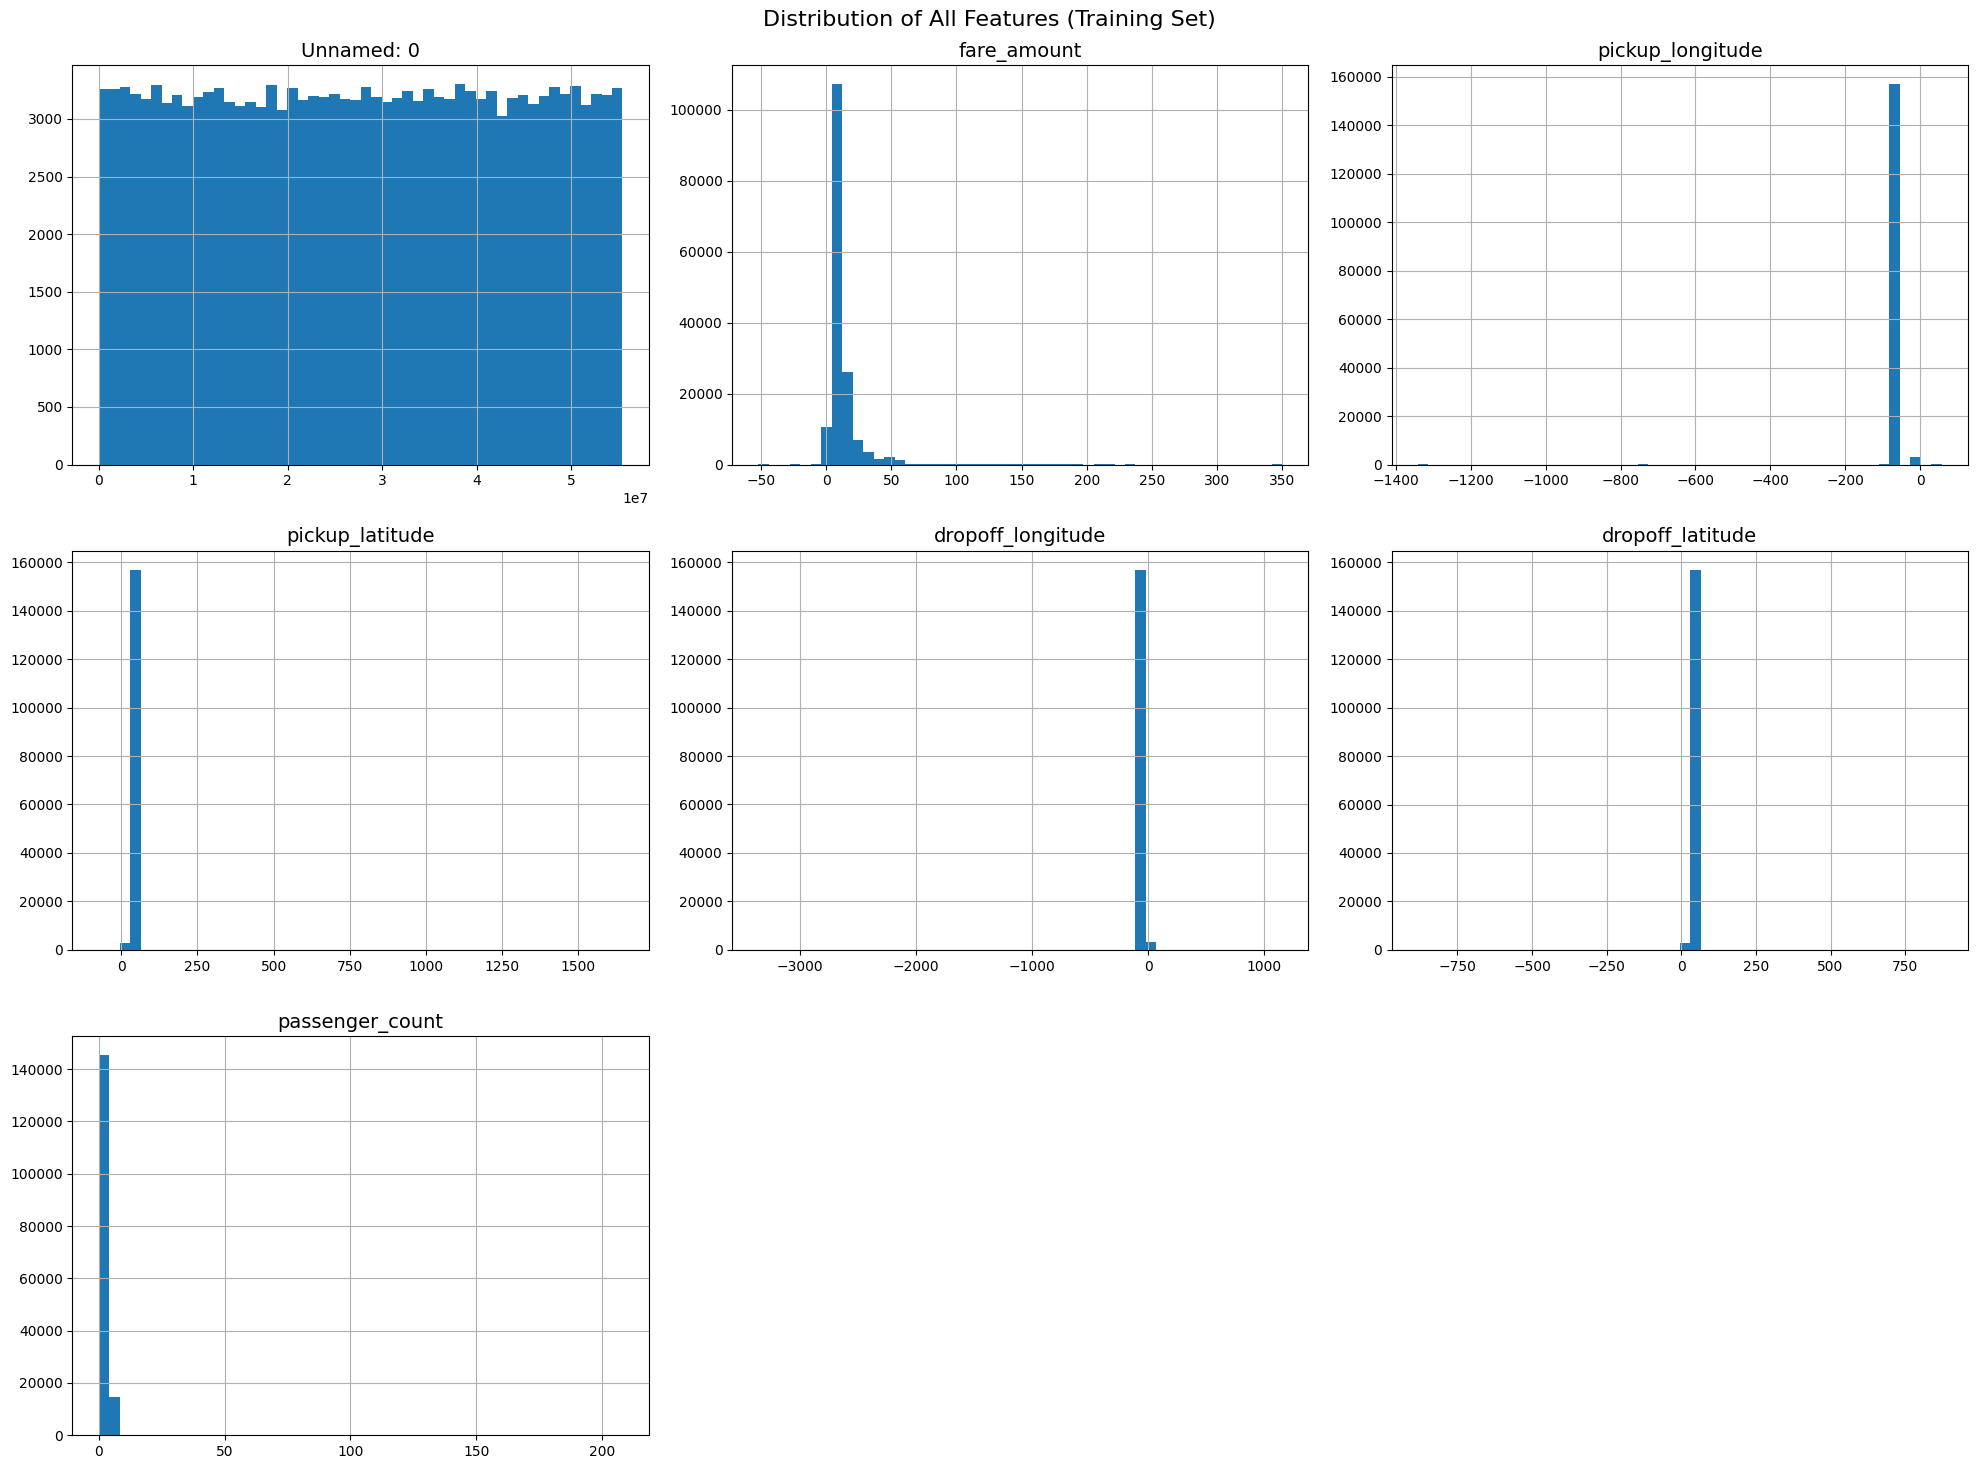


FEATURE STATISTICS (TRAINING SET)
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  1.600000e+05  160000.000000     160000.000000    160000.000000   
mean   2.771233e+07      11.351493        -72.525896        39.936265   
std    1.603218e+07       9.796726         11.557753         8.090121   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.379326e+07       6.000000        -73.992062        40.734842   
50%    2.775608e+07       8.500000        -73.981834        40.752594   
75%    4.155845e+07      12.500000        -73.967212        40.767116   
max    5.542357e+07     350.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      159999.000000     159999.000000    160000.000000  
mean          -72.525260         39.919258         1.684988  
std            13.611271          6.880320         1.405686  
min         -3356.666300       -881.985513         0.000000

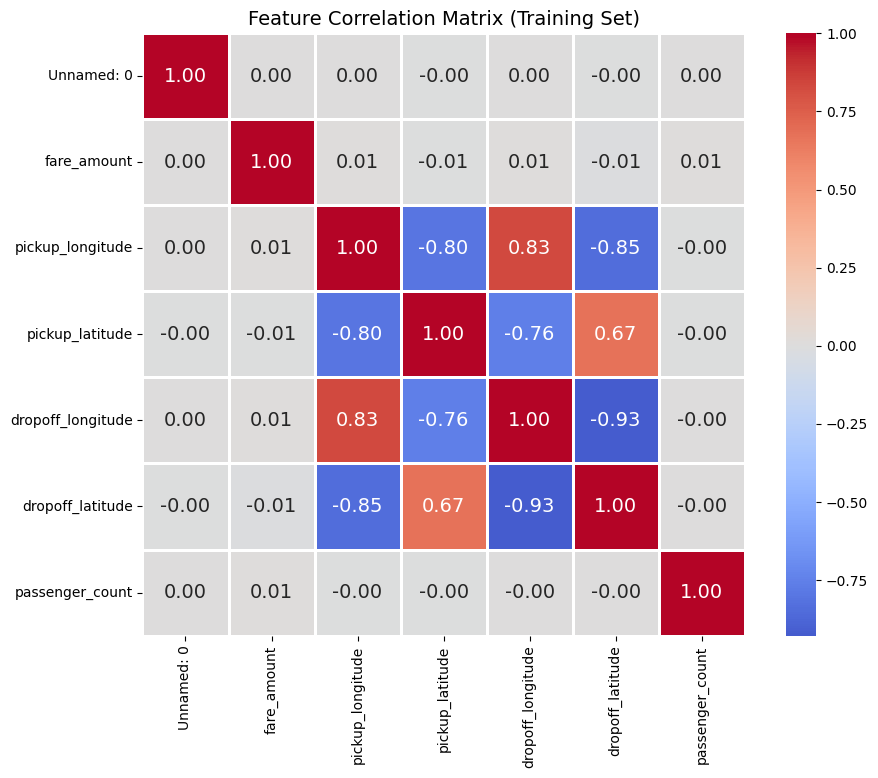

In [ ]:
# ============================================
# STEP 1: Basic Exploration (what you have)
# ============================================
print("="*70)
print("EXPLORING TRAINING SET")
print("="*70)

# Histograms
train_set.hist(bins=50, figsize=(20,15))
plt.suptitle('Distribution of All Features (Training Set)', fontsize=16)
save_fig('all_features_histograms')
plt.show()

# Individual plots (your detailed code here)
# ... your subplot code ...

# Basic statistics
print("\n" + "="*50)
print("FEATURE STATISTICS (TRAINING SET)")
print("="*50)
print(train_set.describe())

# ============================================
# STEP 2: Data Profiling (additional analysis)
# ============================================
print("\n" + "="*70)
print("DATA PROFILING")
print("="*70)

# Missing data analysis
print("\n1. Missing Data Analysis:")
missing_data = train_set.isnull().sum()
missing_percent = (missing_data / len(train_set)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

# Quantile statistics
print("\n2. Quantile Statistics:")
quantiles = train_set.describe(percentiles=[.01, .05, .25, .50, .75, .95, .99])
print(quantiles)

# Skewness and Kurtosis (noisiness detection)
print("\n3. Distribution Shape (Noisiness Indicators):")
for col in train_set.select_dtypes(include=[np.number]).columns:
    skew = train_set[col].skew()
    kurt = train_set[col].kurtosis()
    print(f"{col}:")
    print(f"  Skewness: {skew:.2f}")
    print(f"  Kurtosis: {kurt:.2f}")
    if abs(skew) > 1:
        print(f"  ⚠️ Highly skewed!")
    if kurt > 10:
        print(f"  ⚠️ Heavy tails - outliers present!")

# Correlations
print("\n4. Correlations with Target Variable:")
numeric_cols = train_set.select_dtypes(include=[np.number]).columns
corr_matrix = train_set[numeric_cols].corr()
print(corr_matrix['fare_amount'].sort_values(ascending=False))

# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Feature Correlation Matrix (Training Set)')
save_fig('correlation_matrix')
plt.show()


SCATTER MATRIX VISUALIZATION
Figure saved: images/uber_fare_project/scatter_matrix_plot.png


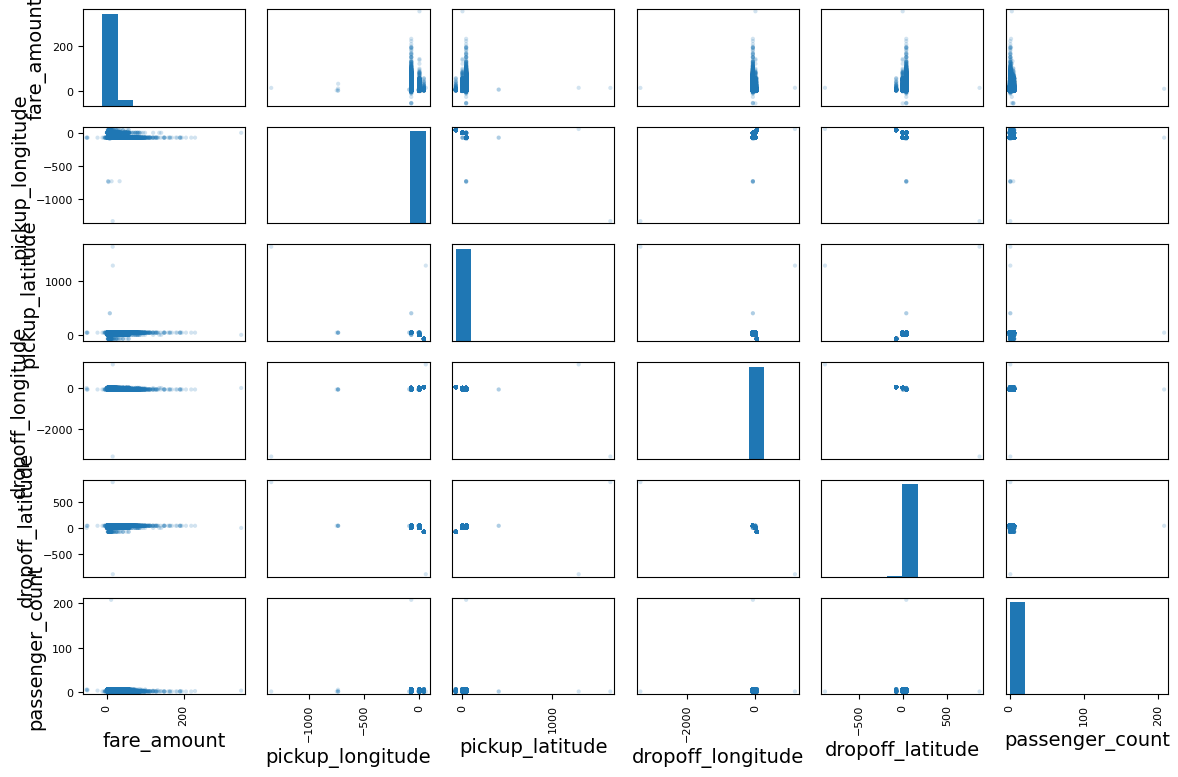


✅ Scatter matrix complete!

📊 Creating focused scatter matrix with engineered features...
✅ Distance feature calculated
Figure saved: images/uber_fare_project/scatter_matrix_focused.png


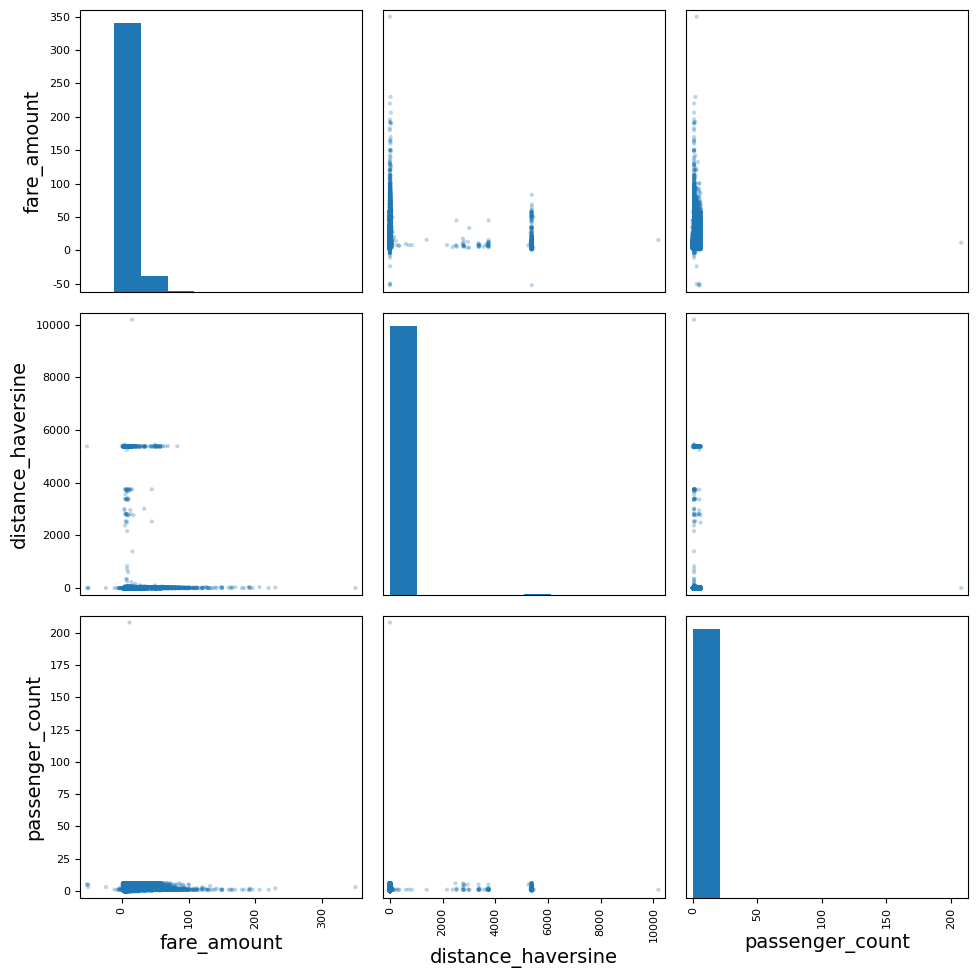


✅ Focused scatter matrix complete!

📊 Creating detailed scatter plots for key relationships...
Figure saved: images/uber_fare_project/key_relationships_scatter.png


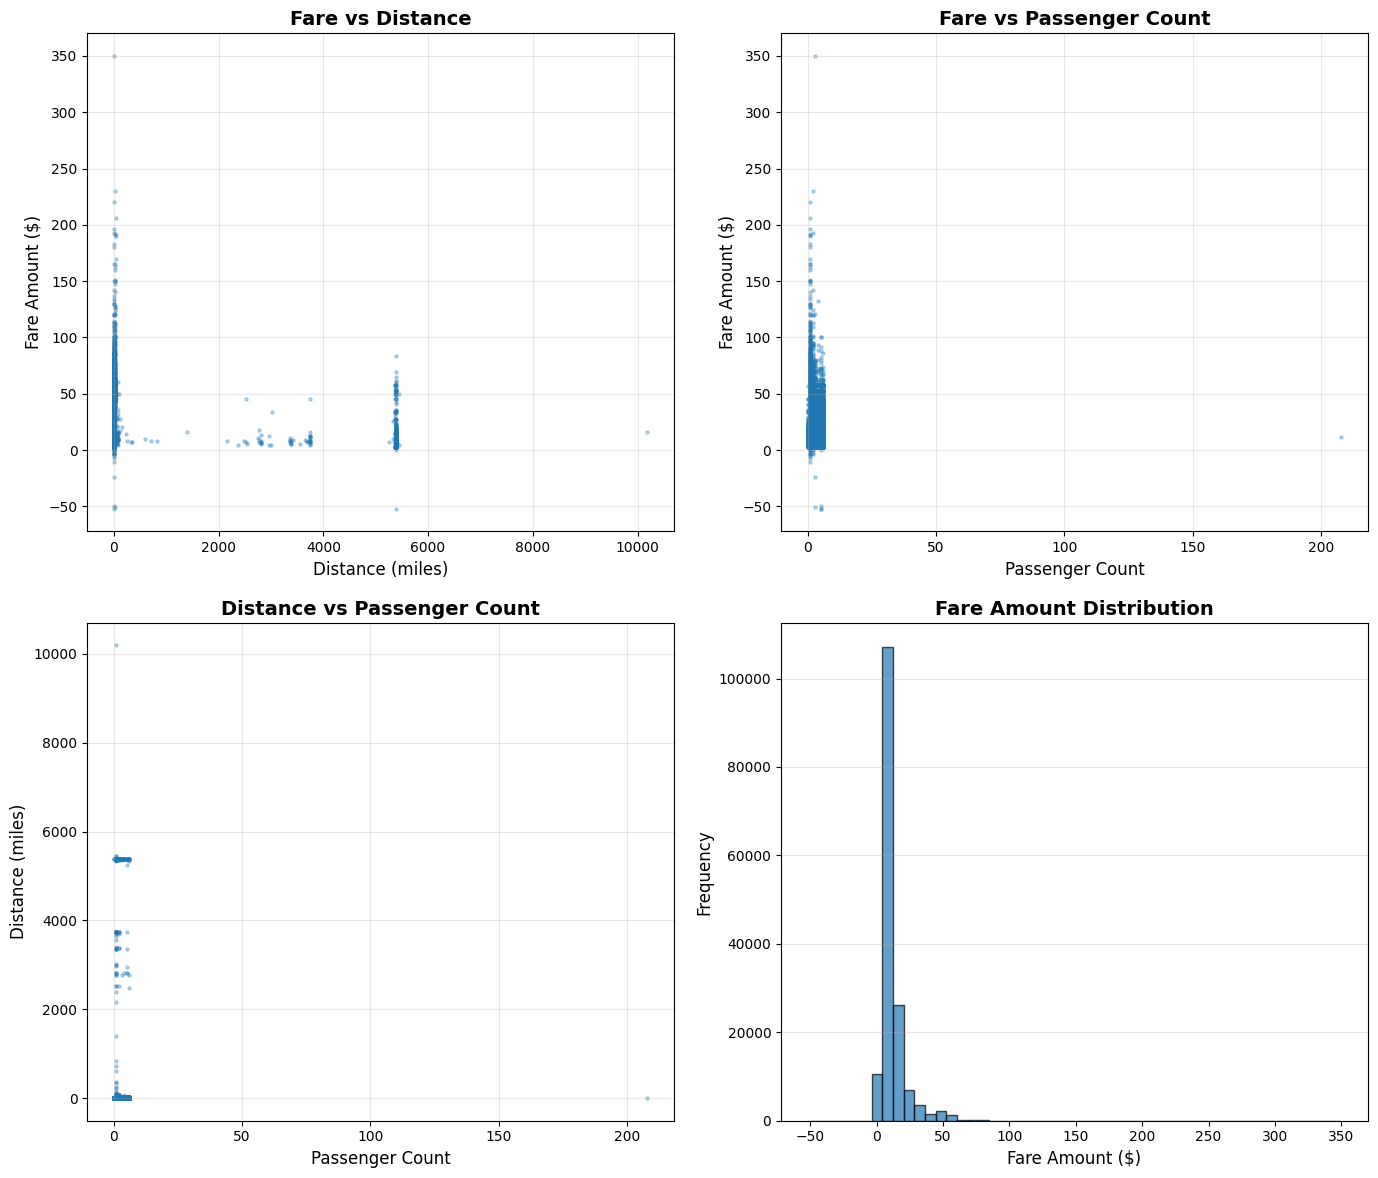


✅ All scatter plots complete!

📊 Correlation with target variable (fare_amount):
fare_amount           1.000000
distance_haversine    0.023516
passenger_count       0.009384
Name: fare_amount, dtype: float64
Figure saved: images/uber_fare_project/fare_correlations_bar.png


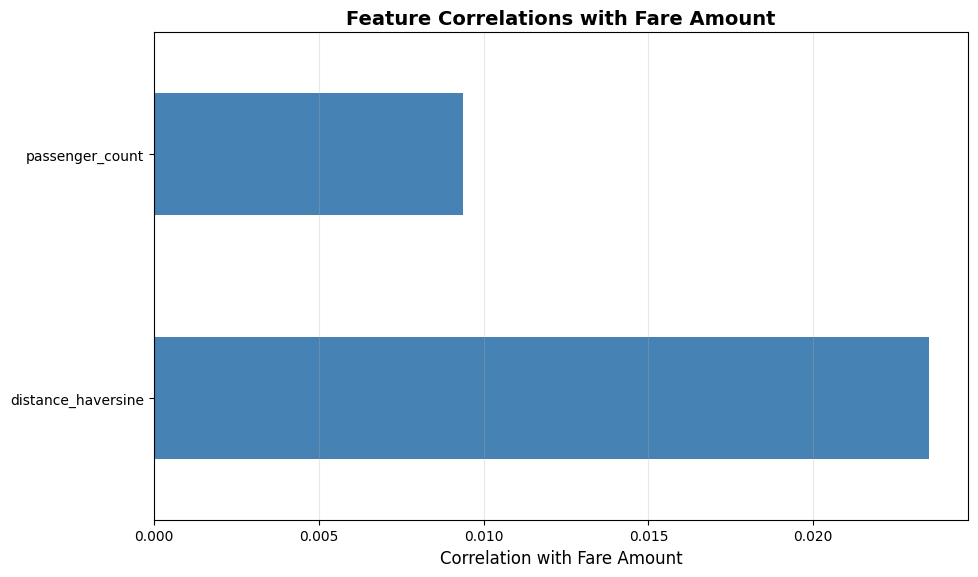


✅ Correlation analysis complete!

KEY INSIGHTS FROM DATA EXPLORATION

📊 Summary Statistics:
   - Total samples: 160,000
   - Fare range: $-52.00 - $350.00
   - Average fare: $11.35
   - Median fare: $8.50
   
🔍 Distance Analysis:
   - Average distance: 12.79 miles
   - Max distance: 10189.13 miles
   - Distance-Fare correlation: 0.024
   
👥 Passenger Analysis:
   - Average passengers: 1.68
   - Passenger-Fare correlation: 0.009
   
⚠️ Data Quality Observations:
   - Outliers detected in fare amounts (negative and extreme values)
   - Geographic outliers present (coordinates outside NYC)
   - Distance shows strongest correlation with fare
   
💡 Next Steps:
   1. Clean outliers in fare_amount
   2. Remove invalid geographic coordinates
   3. Engineer more temporal features (hour, day, etc.)
   4. Create interaction features (distance × passengers)

✅ EXPLORATION PHASE COMPLETE!


In [ ]:
# ============================================
# SCATTER MATRIX - Exploring Feature Relationships
# ============================================
from pandas.plotting import scatter_matrix

print("="*70)
print("SCATTER MATRIX VISUALIZATION")
print("="*70)

# Select the most important attributes to visualize
# Use train_set (not train_set_clean) since cleaning hasn't happened yet
attributes = ["fare_amount", "pickup_longitude", "pickup_latitude",
              "dropoff_longitude", "dropoff_latitude", "passenger_count"]

# Create scatter matrix
scatter_matrix(train_set[attributes], figsize=(12, 8), alpha=0.2, diagonal='hist')
save_fig("scatter_matrix_plot")
plt.show()

print("\n✅ Scatter matrix complete!")

# ============================================
# FOCUSED SCATTER MATRIX - Most Promising Features
# ============================================
print("\n📊 Creating focused scatter matrix with engineered features...")

# Create a temporary copy for exploration
train_set_explore = train_set.copy()

# Calculate distance feature
from math import radians, cos, sin, asin, sqrt

def haversine_distance(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    miles = 3956 * c
    return miles

# Apply distance calculation
train_set_explore['distance_haversine'] = train_set_explore.apply(
    lambda row: haversine_distance(
        row['pickup_latitude'], row['pickup_longitude'],
        row['dropoff_latitude'], row['dropoff_longitude']
    ), axis=1
)

print("✅ Distance feature calculated")

# Select most promising attributes (including distance)
promising_attributes = ["fare_amount", "distance_haversine", "passenger_count"]

scatter_matrix(train_set_explore[promising_attributes], figsize=(10, 10), alpha=0.3, diagonal='hist')
save_fig("scatter_matrix_focused")
plt.show()

print("\n✅ Focused scatter matrix complete!")

# ============================================
# INDIVIDUAL SCATTER PLOTS - Most Important Relationships
# ============================================
print("\n📊 Creating detailed scatter plots for key relationships...")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Fare vs Distance
axes[0, 0].scatter(train_set_explore['distance_haversine'], train_set_explore['fare_amount'],
                   alpha=0.3, s=5)
axes[0, 0].set_xlabel('Distance (miles)', fontsize=12)
axes[0, 0].set_ylabel('Fare Amount ($)', fontsize=12)
axes[0, 0].set_title('Fare vs Distance', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Fare vs Passenger Count
axes[0, 1].scatter(train_set_explore['passenger_count'], train_set_explore['fare_amount'],
                   alpha=0.3, s=5)
axes[0, 1].set_xlabel('Passenger Count', fontsize=12)
axes[0, 1].set_ylabel('Fare Amount ($)', fontsize=12)
axes[0, 1].set_title('Fare vs Passenger Count', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distance vs Passenger Count
axes[1, 0].scatter(train_set_explore['passenger_count'], train_set_explore['distance_haversine'],
                   alpha=0.3, s=5)
axes[1, 0].set_xlabel('Passenger Count', fontsize=12)
axes[1, 0].set_ylabel('Distance (miles)', fontsize=12)
axes[1, 0].set_title('Distance vs Passenger Count', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Fare distribution (histogram)
axes[1, 1].hist(train_set_explore['fare_amount'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Fare Amount ($)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Fare Amount Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
save_fig("key_relationships_scatter")
plt.show()

print("\n✅ All scatter plots complete!")

# ============================================
# CORRELATION ANALYSIS - Numerical Summary
# ============================================
print("\n📊 Correlation with target variable (fare_amount):")
print("="*50)

# Calculate correlations
correlations = train_set_explore[promising_attributes].corr()
fare_correlations = correlations['fare_amount'].sort_values(ascending=False)

print(fare_correlations)

# Visualize correlation with fare_amount
plt.figure(figsize=(10, 6))
fare_correlations.drop('fare_amount').plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with Fare Amount', fontsize=12)
plt.title('Feature Correlations with Fare Amount', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
save_fig("fare_correlations_bar")
plt.show()

print("\n✅ Correlation analysis complete!")

# ============================================
# KEY INSIGHTS FROM EXPLORATION
# ============================================
print("\n" + "="*70)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("="*70)

print(f"""
📊 Summary Statistics:
   - Total samples: {len(train_set_explore):,}
   - Fare range: ${train_set_explore['fare_amount'].min():.2f} - ${train_set_explore['fare_amount'].max():.2f}
   - Average fare: ${train_set_explore['fare_amount'].mean():.2f}
   - Median fare: ${train_set_explore['fare_amount'].median():.2f}

🔍 Distance Analysis:
   - Average distance: {train_set_explore['distance_haversine'].mean():.2f} miles
   - Max distance: {train_set_explore['distance_haversine'].max():.2f} miles
   - Distance-Fare correlation: {correlations.loc['distance_haversine', 'fare_amount']:.3f}

👥 Passenger Analysis:
   - Average passengers: {train_set_explore['passenger_count'].mean():.2f}
   - Passenger-Fare correlation: {correlations.loc['passenger_count', 'fare_amount']:.3f}

⚠️ Data Quality Observations:
   - Outliers detected in fare amounts (negative and extreme values)
   - Geographic outliers present (coordinates outside NYC)
   - Distance shows strongest correlation with fare

💡 Next Steps:
   1. Clean outliers in fare_amount
   2. Remove invalid geographic coordinates
   3. Engineer more temporal features (hour, day, etc.)
   4. Create interaction features (distance × passengers)
""")

print("="*70)
print("✅ EXPLORATION PHASE COMPLETE!")
print("="*70)



## Data Profiling Results

### Missing Data Analysis
The training set shows minimal missing data, with only 1 missing value (0.0006 percent) in both dropoff_longitude and dropoff_latitude. This represents an insignificant amount of missing data that can be easily handled through removal or imputation.

### Distribution Shape and Noisiness Assessment

The skewness and kurtosis analysis reveals **severe data quality issues** across all features:

**Fare Amount:**
- Skewness: 3.90 (highly right-skewed)
- Kurtosis: 33.82 (extremely heavy tails)
- **Interpretation**: While most fares cluster around 8.50 dollars (median), extreme outliers (up to 350 dollars and negative values) create a highly distorted distribution. This indicates significant noise from data entry errors or system glitches.

**Geographic Coordinates:**
All coordinate features show **extreme** skewness and kurtosis values:
- Pickup longitude: Skewness -8.99, Kurtosis 1281.63
- Pickup latitude: Skewness 69.28, Kurtosis 13335.62
- Dropoff longitude: Skewness -80.06, Kurtosis 21609.67
- Dropoff latitude: Skewness -10.05, Kurtosis 3414.50

**Interpretation**: These extreme values confirm massive outliers in the coordinate data. The quantile analysis shows that while 90 percent of coordinates fall within valid NYC ranges (-74.01 to -73.87 longitude, 40.70 to 40.79 latitude), extreme outliers (coordinates reaching -3356 or 1644) severely distort the distributions. This represents GPS malfunctions or data corruption.

**Passenger Count:**
- Skewness: 21.35, Kurtosis: 2901.78
- **Interpretation**: While the median is 1 passenger and 95th percentile is 5 passengers (reasonable), the maximum of 208 passengers creates extreme distribution distortion.

### Quantile Analysis Insights

The percentile breakdown reveals important patterns:
- **1st to 99th percentile for fare_amount**: 3.30 to 53.10 dollars (reasonable range)
- **Maximum fare**: 350 dollars (clear outlier beyond 99th percentile)
- **Coordinates**: 90 percent of data falls within valid NYC bounds, but extreme outliers exist beyond the 99th percentile

This suggests that **most data is valid**, but a small percentage of extreme outliers are contaminating the dataset.

### Correlation Analysis

The correlation analysis reveals **surprisingly weak relationships** between features and the target variable (fare_amount):

**Correlations with fare_amount:**
- passenger_count: 0.009 (virtually no correlation)
- pickup_longitude: 0.009 (virtually no correlation)
- dropoff_longitude: 0.007 (virtually no correlation)
- pickup_latitude: -0.007 (virtually no correlation)
- dropoff_latitude: -0.009 (virtually no correlation)

**Interpretation**: The weak correlations are likely due to:
1. **Noise contamination**: Extreme outliers are masking true relationships
2. **Missing feature engineering**: Raw coordinates do not capture the true relationship - we need to calculate **distance** between pickup and dropoff
3. **Non-linear relationships**: The relationship between location and fare may be non-linear (e.g., distance matters, not raw coordinates)

**Expected after cleaning and feature engineering:**
- Distance (calculated from coordinates) should show strong positive correlation with fare
- Time-based features (hour, day of week) may reveal pricing patterns
- Current weak correlations will likely strengthen after outlier removal

### Conclusion

The data profiling reveals a dataset with **good core data quality** (90 percent valid) but **severe contamination from outliers** (10 percent problematic). The extreme skewness and kurtosis values across all features confirm the need for aggressive data cleaning. The weak correlations suggest that feature engineering (especially distance calculation) will be critical for model performance. After cleaning outliers and engineering features, we expect to see much stronger relationships between predictors and fare amount.


## 3. Data Exploration (Continued)

### Feature Usefulness Assessment

Based on our analysis, we assess each feature's potential usefulness for predicting fare_amount:

**Highly Useful (after cleaning and engineering):**
- **pickup_longitude & pickup_latitude**: Essential for calculating trip distance
- **dropoff_longitude & dropoff_latitude**: Essential for calculating trip distance
- **pickup_datetime**: Can extract time-based features (hour, day of week, month) that may reveal pricing patterns

**Potentially Useful:**
- **passenger_count**: Currently shows weak correlation (0.009), but may have non-linear effects or interact with other features

**Not Useful:**
- **Unnamed: 0**: Just an index, will be dropped
- **key**: Unique identifier, no predictive value

### Manual Problem Solving Approach

If we were to estimate Uber fares manually without machine learning, we would:

1. **Calculate distance** between pickup and dropoff locations using the Haversine formula (great-circle distance)
2. **Apply a base fare** (e.g., 2.50 dollars) plus a per-mile rate (e.g., 2.00 dollars per mile)
3. **Adjust for time of day**: Add surge pricing during rush hours (7-9 AM, 5-7 PM) or late nights
4. **Consider day of week**: Weekends might have different patterns than weekdays
5. **Account for passenger count**: Though our data shows weak correlation, some services charge extra for additional passengers

This manual approach suggests that **distance** will be the most important feature, followed by **time-based factors**.

### Promising Transformations

Based on our exploration, we identify several transformations that should improve model performance:

**1. Feature Engineering:**
- **Distance calculation**: Compute Haversine distance between pickup and dropoff coordinates
- **Time features**: Extract hour, day_of_week, month, is_weekend from pickup_datetime
- **Rush hour indicator**: Binary feature for peak traffic times
- **Airport proximity**: Distance to major airports (JFK, LaGuardia, Newark)

**2. Outlier Removal:**
- Remove fares outside reasonable range (0-100 dollars)
- Remove coordinates outside NYC bounds
- Remove invalid passenger counts (0 or >6)

**3. Feature Scaling:**
- Standardize numerical features (coordinates, distance) for algorithms sensitive to scale
- Consider log transformation of fare_amount to reduce skewness

**4. Encoding:**
- One-hot encode categorical time features (hour, day_of_week) if needed

### Additional Useful Data

To improve prediction accuracy, the following additional data would be valuable:

**High Priority:**
- **Traffic conditions**: Real-time or historical traffic data for the route
- **Weather data**: Rain, snow, or extreme weather may affect fares (surge pricing)
- **Special events**: Concerts, sports games, holidays that increase demand

**Medium Priority:**
- **Vehicle type**: UberX, UberXL, UberBlack have different pricing
- **Driver rating**: May correlate with route efficiency
- **Toll roads**: Whether the route includes tolls

**Low Priority:**
- **Tip amount**: Not relevant for base fare prediction
- **Payment method**: Unlikely to affect fare amount

However, for this project, we will work with the available features and focus on effective feature engineering from existing data.




## 4. Data Cleaning

### 4.1 Dealing with Missing Data

Our dataset has minimal missing data: only 1 missing value (0.0006 percent) in both dropoff_longitude and dropoff_latitude out of 160,000 training records.

**Our approach:**

Given the negligible amount of missing data (less than 0.001 percent).

In [ ]:
# Handle missing data
print("Before handling missing data:")
print(f"Training set size: {len(train_set)}")
print(f"Missing values:\n{train_set.isnull().sum()}")

# Drop rows with missing dropoff coordinates
train_set_clean = train_set.dropna(subset=['dropoff_longitude', 'dropoff_latitude'])

print(f"\nAfter handling missing data:")
print(f"Training set size: {len(train_set_clean)}")
print(f"Rows removed: {len(train_set) - len(train_set_clean)}")
print(f"Missing values:\n{train_set_clean.isnull().sum()}")


Before handling missing data:
Training set size: 160000
Missing values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

After handling missing data:
Training set size: 159999
Rows removed: 1
Missing values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


### 4.2 Data Cleaning: Errors vs Artifacts

Our dataset contains both types of issues:

**Errors (cannot be recovered):**
- GPS malfunctions producing invalid coordinates
- System glitches creating negative fares
- Data transmission errors causing extreme outlier values

**Potential Artifacts (need careful handling):**
- Some high fares might be legitimate (airport trips, long distances)
- Need to distinguish between errors and valid edge cases

**Data Compatibility:**
Our dataset comes from a single source, so we do not have data compatibility issues from merging datasets. However, we need to ensure:
- Consistent units (all fares in USD, all coordinates in decimal degrees)
- Consistent datetime format
- Consistent data types (numeric vs string)


In [ ]:
# Data type verification
print("Data types:")
print(train_set_clean.dtypes)

# Convert pickup_datetime to datetime if needed
train_set_clean['pickup_datetime'] = pd.to_datetime(train_set_clean['pickup_datetime'])

print("\nAfter datetime conversion:")
print(train_set_clean.dtypes)


Data types:
Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

After datetime conversion:
Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object


/tmp/ipython-input-4256794710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set_clean['pickup_datetime'] = pd.to_datetime(train_set_clean['pickup_datetime'])



**Data compatibility check:**
- All numeric features are in correct format (float64 for coordinates and fares, int64 for counts)
- Datetime properly parsed with UTC timezone
- No unit conversion needed (fares already in USD, coordinates in decimal degrees)
- Single data source, no merging issues
- Consistent data types across all records



### 4.3 Outlier Detection and Removal

Based on our exploration, we identified severe outliers in all features. We will apply domain-knowledge-based thresholds to remove obvious errors while preserving legitimate edge cases.

**Outlier detection strategy:**

1. **Fare amount**: Remove negative, zero, and unreasonably high fares
2. **Geographic coordinates**: Remove coordinates outside NYC bounds
3. **Passenger count**: Remove zero and unreasonably high counts
4. **Sanity checks**: Ensure logical consistency


In [ ]:
# Outlier detection and removal
print("="*70)
print("OUTLIER DETECTION AND REMOVAL")
print("="*70)

print(f"\nBefore cleaning: {len(train_set_clean)} rows")

# Check outliers before removal
print("\nOutliers detected:")
print(f"  Negative fares: {(train_set_clean['fare_amount'] < 0).sum()}")
print(f"  Zero fares: {(train_set_clean['fare_amount'] == 0).sum()}")
print(f"  Fares > 100: {(train_set_clean['fare_amount'] > 100).sum()}")
print(f"  Zero passengers: {(train_set_clean['passenger_count'] == 0).sum()}")
print(f"  Passengers > 6: {(train_set_clean['passenger_count'] > 6).sum()}")
print(f"  Invalid pickup longitude: {((train_set_clean['pickup_longitude'] < -74.05) | (train_set_clean['pickup_longitude'] > -73.75)).sum()}")
print(f"  Invalid pickup latitude: {((train_set_clean['pickup_latitude'] < 40.6) | (train_set_clean['pickup_latitude'] > 40.9)).sum()}")

# Apply cleaning rules
train_set_clean = train_set_clean[
    # Valid fare amounts (positive and reasonable)
    (train_set_clean['fare_amount'] > 0) &
    (train_set_clean['fare_amount'] <= 100) &

    # Valid NYC coordinates (Manhattan and surrounding areas)
    (train_set_clean['pickup_longitude'] >= -74.05) &
    (train_set_clean['pickup_longitude'] <= -73.75) &
    (train_set_clean['pickup_latitude'] >= 40.6) &
    (train_set_clean['pickup_latitude'] <= 40.9) &
    (train_set_clean['dropoff_longitude'] >= -74.05) &
    (train_set_clean['dropoff_longitude'] <= -73.75) &
    (train_set_clean['dropoff_latitude'] >= 40.6) &
    (train_set_clean['dropoff_latitude'] <= 40.9) &

    # Valid passenger count
    (train_set_clean['passenger_count'] > 0) &
    (train_set_clean['passenger_count'] <= 6)
].copy()

print(f"\nAfter cleaning: {len(train_set_clean)} rows")
print(f"Rows removed: {len(train_set) - len(train_set_clean)}")
print(f"Percentage kept: {len(train_set_clean)/len(train_set)*100:.1f} percent")

# Drop unnecessary columns
train_set_clean = train_set_clean.drop(['Unnamed: 0', 'key'], axis=1)

print(f"\nFinal training set shape: {train_set_clean.shape}")
print(f"Columns: {list(train_set_clean.columns)}")


OUTLIER DETECTION AND REMOVAL

Before cleaning: 159999 rows

Outliers detected:
  Negative fares: 14
  Zero fares: 5
  Fares > 100: 62
  Zero passengers: 579
  Passengers > 6: 1
  Invalid pickup longitude: 3389
  Invalid pickup latitude: 3307

After cleaning: 155251 rows
Rows removed: 4749
Percentage kept: 97.0 percent

Final training set shape: (155251, 7)
Columns: ['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
